## Loan Prediction Analysis - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

## Loading the dataset 

In [2]:
df = pd.read_csv('train.csv.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Pre-processing the dataset

In [6]:
# find the null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values from numerical terms - mean

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) 
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# fill the missing values from categorical terms - mode

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory data analysis (EDA)

### Categorical terms visualization

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

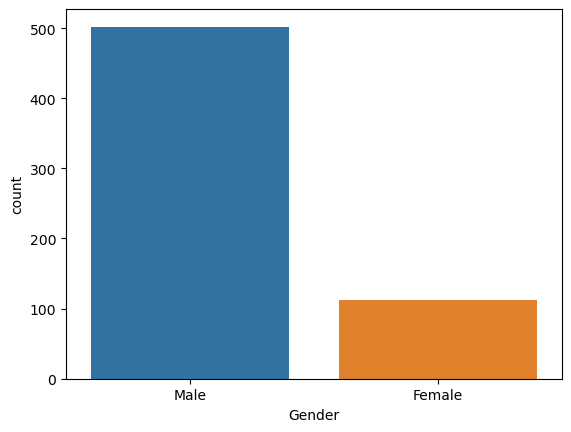

In [11]:
sns.countplot(df['Gender'])

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

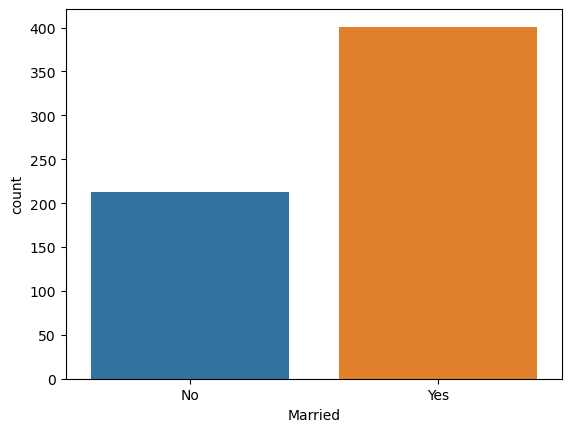

In [12]:
sns.countplot(df['Married'])

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

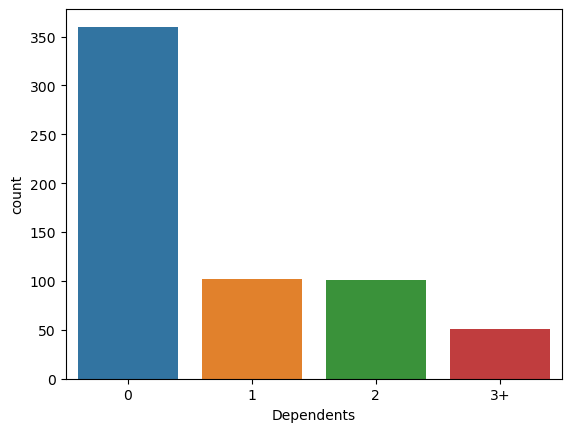

In [13]:
sns.countplot(df['Dependents'])

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

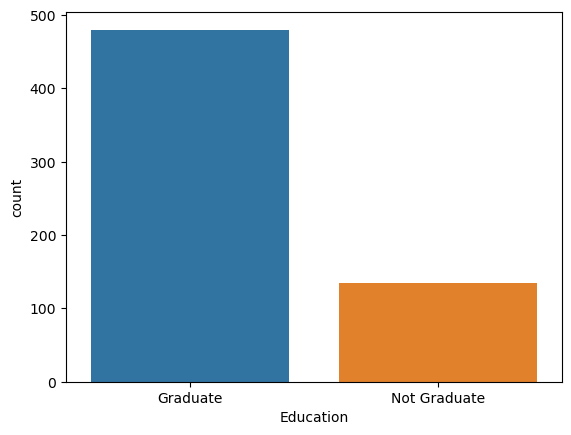

In [14]:
sns.countplot(df['Education'])

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

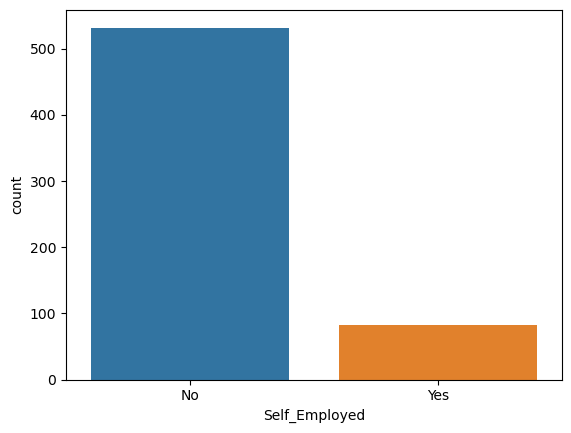

In [15]:
sns.countplot(df['Self_Employed'])

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

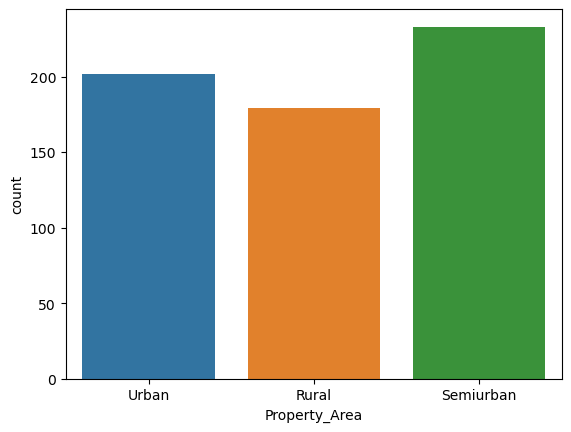

In [16]:
sns.countplot(df['Property_Area'])

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

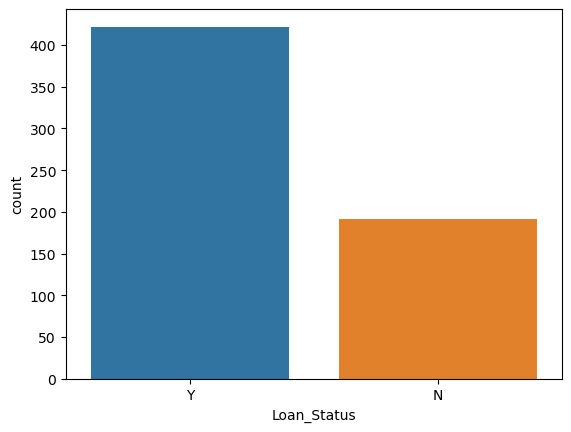

In [17]:
sns.countplot(df['Loan_Status'])

### Numerical terms visualization

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

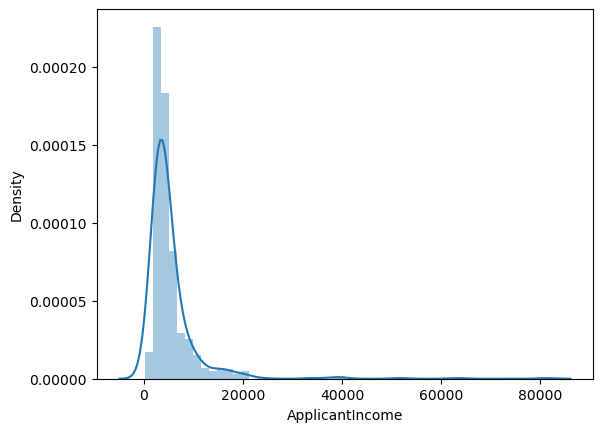

In [18]:
sns.distplot(df['ApplicantIncome'])

In [19]:
# df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

In [20]:
# sns.distplot(df['ApplicantIncome'])

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

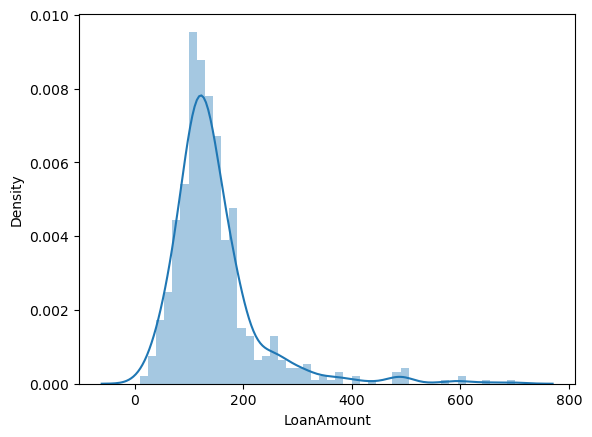

In [21]:
sns.distplot(df['LoanAmount'])

In [22]:
# df['LoanAmount'] = np.log(df['LoanAmount'])

In [23]:
df['LoanAmount'].head()

0    146.412162
1    128.000000
2     66.000000
3    120.000000
4    141.000000
Name: LoanAmount, dtype: float64

In [24]:
df['LoanAmount'].isnull().sum()

0

In [25]:
# sns.distplot(df['LoanAmount'])

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

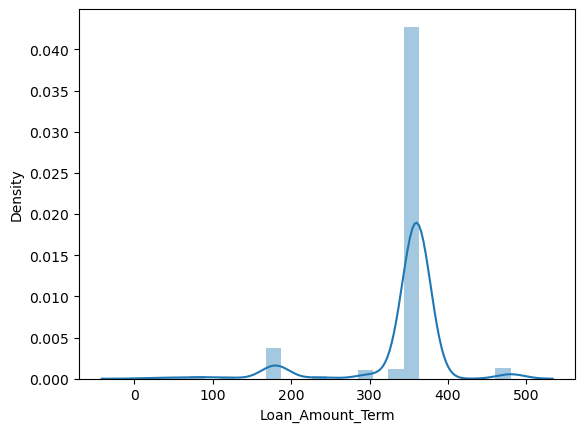

In [26]:
sns.distplot(df['Loan_Amount_Term'])

In [27]:
# df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
# sns.distplot(df['Loan_Amount_Term'])

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

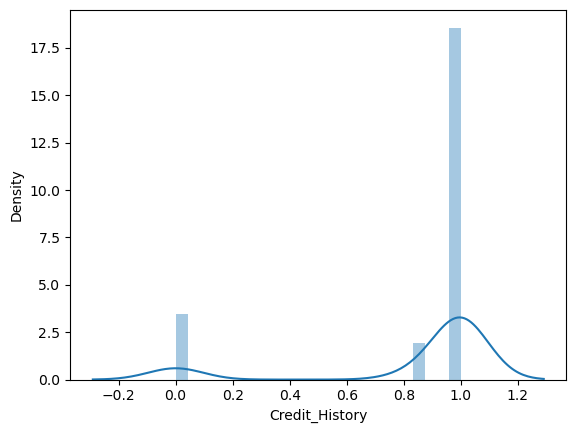

In [28]:
sns.distplot(df['Credit_History'])

## Creation of new attributes

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [30]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Apply log transformation

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

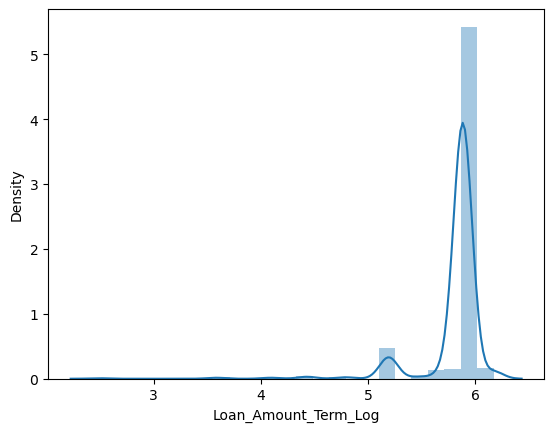

In [31]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome_Log', ylabel='Density'>

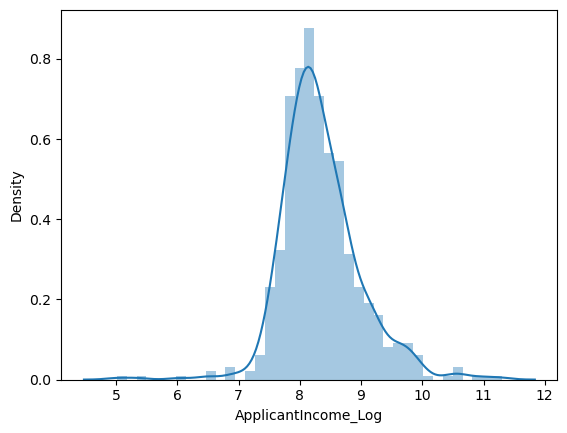

In [32]:
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome_Log'])

In [33]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome'])

# ln(0) -- > problem
# sns.distplot(df['CoapplicantIncome_Log'])  

I:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_Log', ylabel='Density'>

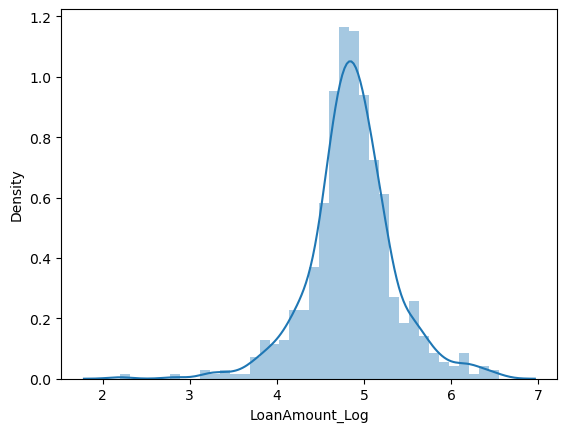

In [34]:
df['LoanAmount_Log'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_Log'])

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_income', ylabel='Density'>

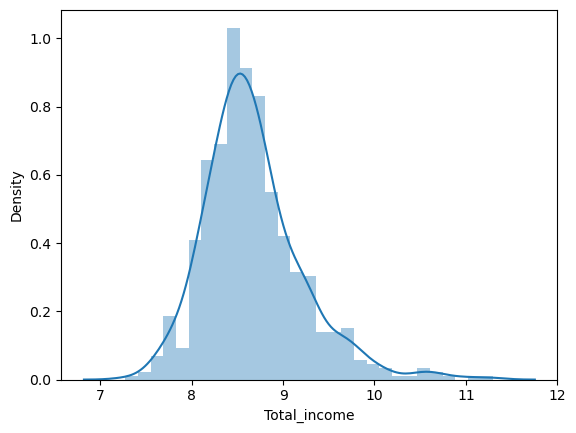

In [35]:
df['Total_income'] = np.log(df['Total_income'])
sns.distplot(df['Total_income'])

## Correlation Matrix

<AxesSubplot:>

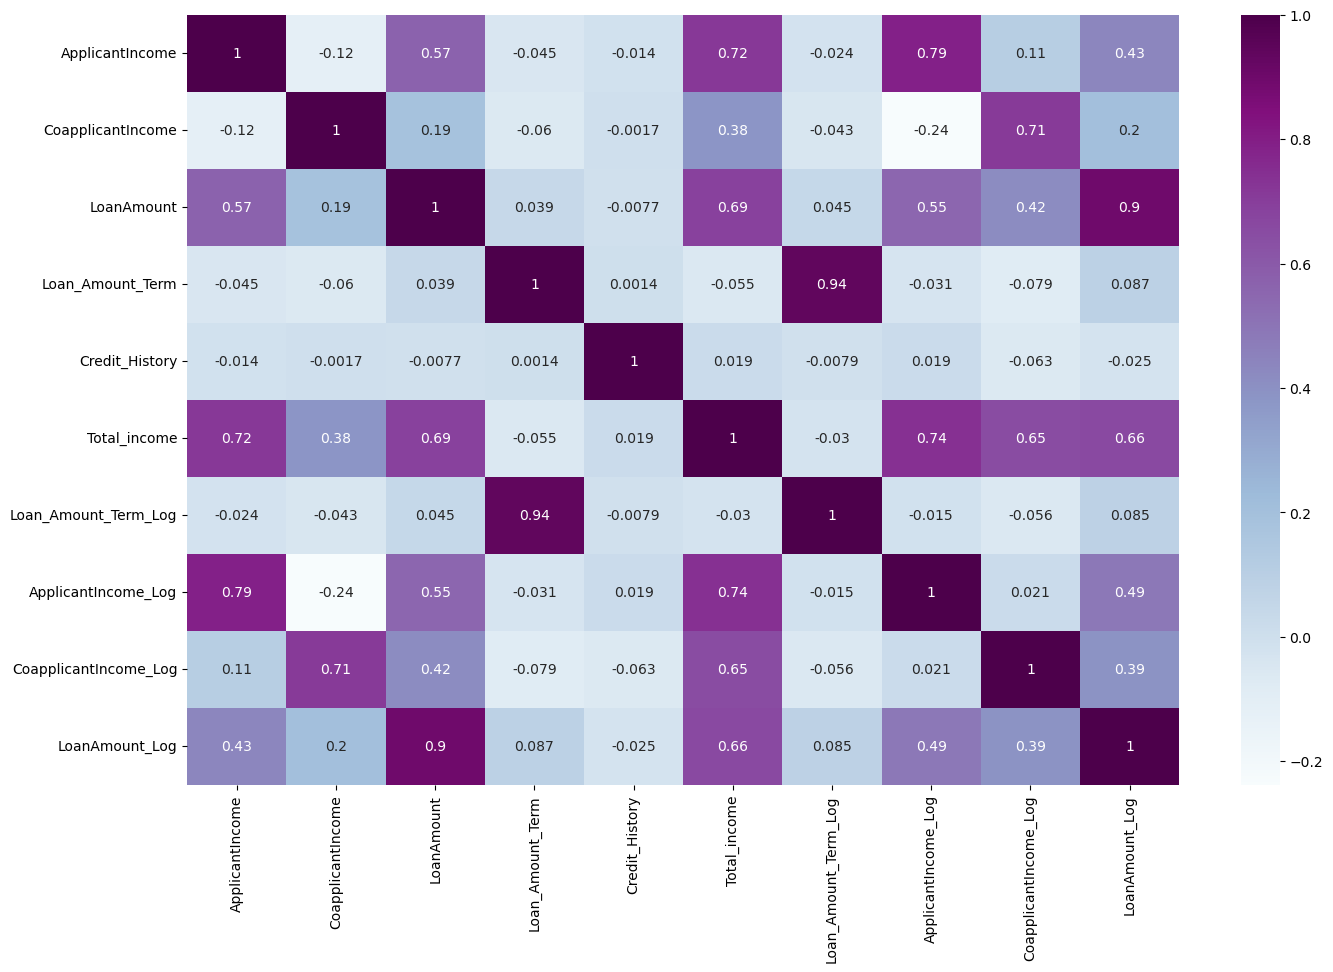

In [36]:
corr = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot =True, cmap='BuPu')

In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'Loan_Amount_Term_Log', 'ApplicantIncome_Log',
       'CoapplicantIncome_Log', 'LoanAmount_Log'],
      dtype='object')

In [38]:
# drop unnecessary columns

cols =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Loan_ID', 'Loan_ID', 'CoapplicantIncome_Log']

df =df.drop(columns = cols, axis =1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_income,Loan_Amount_Term_Log,ApplicantIncome_Log,LoanAmount_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,5.886104,8.674026,4.986426
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,5.886104,8.430109,4.852030
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,5.886104,8.006368,4.189655
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,5.886104,7.856707,4.787492
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,5.886104,8.699515,4.948760


## Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status', 'Dependents']

In [40]:
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int32  
 1   Married               614 non-null    int32  
 2   Dependents            614 non-null    int32  
 3   Education             614 non-null    int32  
 4   Self_Employed         614 non-null    int32  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int32  
 7   Loan_Status           614 non-null    int32  
 8   Total_income          614 non-null    float64
 9   Loan_Amount_Term_Log  614 non-null    float64
 10  ApplicantIncome_Log   614 non-null    float64
 11  LoanAmount_Log        614 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_income,Loan_Amount_Term_Log,ApplicantIncome_Log,LoanAmount_Log
0,1,0,0,0,0,1.0,2,1,8.674026,5.886104,8.674026,4.986426
1,1,1,1,0,0,1.0,0,0,8.714568,5.886104,8.430109,4.852030
2,1,1,0,0,1,1.0,2,1,8.006368,5.886104,8.006368,4.189655
3,1,1,0,1,0,1.0,2,1,8.505323,5.886104,7.856707,4.787492
4,1,0,0,0,0,1.0,2,1,8.699515,5.886104,8.699515,4.948760


## Train-Test Split

In [43]:
X = df.drop(columns = 'Loan_Status', axis =1)
y = df['Loan_Status']

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [45]:
X_train.shape

(491, 11)

In [46]:
y_train.shape

(491,)

In [47]:
X_test.shape

(123, 11)

In [48]:
y_test.shape

(123,)

## Model Training

In [49]:
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    model.fit(X_train, y_train)
    print("Accuracy is: ", model.score(X_test, y_test)*100)
    
    #cross validation
    score = cross_val_score(model, X, y, cv = 5)
    print("Cross Validation is: ", np.mean(score)*100)
    

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy is:  78.86178861788618
Cross Validation is:  80.9462881514061


In [51]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
classify(model_dtc, X, y)

Accuracy is:  71.54471544715447
Cross Validation is:  70.85299213647875


In [52]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

model_rtc = RandomForestClassifier()
classify(model_rtc, X, y)

Accuracy is:  76.42276422764228
Cross Validation is:  78.01812608290018


In [53]:
model_etc = ExtraTreesClassifier()
classify(model_etc, X, y)

Accuracy is:  74.79674796747967
Cross Validation is:  77.04118352658936


### Hyper parameter tuning

In [54]:
model_rtc = RandomForestClassifier(n_estimators=100,  
                                   min_samples_split=25,
                                  max_depth=7,
                                  max_features=1)
classify(model_rtc, X, y)

Accuracy is:  78.04878048780488
Cross Validation is:  80.78368652538984


## Confusion Matrix

In [55]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19, 24],
       [ 3, 77]], dtype=int64)

<AxesSubplot:>

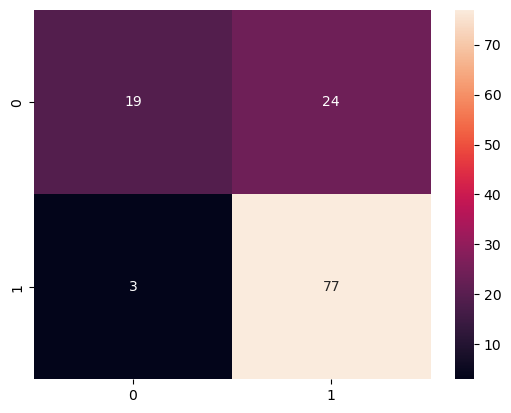

In [57]:
sns.heatmap(cm, annot = True)